In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
import pickle

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

In [2]:
# Training data
app_train = pd.read_csv('application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.drop( ['SK_ID_CURR'], inplace=True, axis=1)
app_train.head()

Training data shape:  (307511, 122)


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#There is lots of null values in our data
app_train.isnull().sum().max()

214865

In [4]:
#drop the columns which has more than 57% null values
#In EDA we saw that EXT_SOURCE1 has a high correlation and 56% missing values,
#so we decided to keep that and delete columns that have more than 57% missing value.
for col in app_train.columns:
    if sum(app_train[col].isnull())/float(len(app_train.index)) > 0.57:
        del app_train[col]

In [5]:
#drop the rows which has a null value
app_train = app_train.dropna()

In [6]:
#This is our new data
app_train.shape

(36264, 98)

In [7]:
app_train.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,36264.000000,36264.000000,3.626400e+04,3.626400e+04,36264.000000,3.626400e+04,36264.000000,36264.000000,36264.000000,36264.000000,...,36264.000000,36264.000000,36264.000000,36264.000000,36264.000000,36264.000000,36264.000000,36264.000000,36264.000000,36264.000000
mean,0.065685,0.539902,1.936332e+05,6.481078e+05,29251.634389,5.859193e+05,0.022410,-14299.107048,-2368.465007,-4514.037199,...,0.010947,0.000662,0.000993,0.000248,0.007473,0.008024,0.037199,0.350347,0.262216,1.819987
std,0.247734,0.755866,1.145574e+05,4.339080e+05,15520.462150,4.002188e+05,0.015261,3366.730682,2259.202504,3201.056365,...,0.104057,0.025718,0.031492,0.015752,0.092604,0.123675,0.208922,1.081998,0.604143,1.797492
min,0.000000,0.000000,2.700000e+04,4.500000e+04,2317.500000,4.500000e+04,0.000290,-25017.000000,-16495.000000,-17176.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.260000e+05,2.909250e+05,17950.500000,2.700000e+05,0.010276,-16627.000000,-3189.000000,-6868.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.710000e+05,5.430375e+05,26653.500000,4.545000e+05,0.019689,-14004.000000,-1669.000000,-4246.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,2.250000e+05,9.000000e+05,37395.000000,7.931250e+05,0.028663,-11628.000000,-780.000000,-1626.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,19.000000,4.500000e+06,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7680.000000,-4.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,19.000000,8.000000,17.000000


In [8]:
#DAYS_BIRTH has negative values, let's examine it.
(app_train['DAYS_BIRTH'] / -365).describe()

count    36264.000000
mean        39.175636
std          9.223920
min         21.041096
25%         31.857534
50%         38.367123
75%         45.553425
max         68.539726
Name: DAYS_BIRTH, dtype: float64

In [9]:
#DAYS_EMPLOYED has also negative values, let's examine it too.
app_train['DAYS_EMPLOYED'].describe()

count    36264.000000
mean     -2368.465007
std       2259.202504
min     -16495.000000
25%      -3189.000000
50%      -1669.000000
75%       -780.000000
max         -4.000000
Name: DAYS_EMPLOYED, dtype: float64

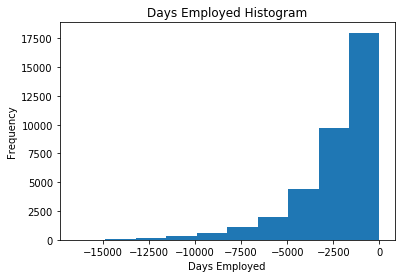

In [10]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employed Histogram');
plt.xlabel('Days Employed');

In [11]:
#Switched their values to their absolute values.
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_EMPLOYED'] = abs(app_train['DAYS_EMPLOYED'])

In [12]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 FLAG_WORK_PHONE                0.015813
OBS_60_CNT_SOCIAL_CIRCLE       0.018256
OBS_30_CNT_SOCIAL_CIRCLE       0.018313
DAYS_REGISTRATION              0.023602
AMT_REQ_CREDIT_BUREAU_YEAR     0.027235
DEF_60_CNT_SOCIAL_CIRCLE       0.028498
DEF_30_CNT_SOCIAL_CIRCLE       0.033281
DAYS_LAST_PHONE_CHANGE         0.034085
DAYS_ID_PUBLISH                0.036684
FLAG_DOCUMENT_3                0.039194
REGION_RATING_CLIENT           0.055215
REGION_RATING_CLIENT_W_CITY    0.059595
TARGET                         1.000000
FLAG_MOBIL                          NaN
FLAG_DOCUMENT_2                     NaN
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3      -0.160984
EXT_SOURCE_1      -0.149420
EXT_SOURCE_2      -0.138307
DAYS_EMPLOYED     -0.060210
DAYS_BIRTH        -0.053576
FLOORSMAX_MODE    -0.045175
FLOORSMAX_AVG     -0.044795
FLOORSMAX_MEDI    -0.044483
AMT_GOODS_PRICE   -0.034342
APARTMENTS_AVG    -0.033310
APARTMENTS_MEDI   -0.032590
ELEV

In [13]:
app_train["FLAG_MOBIL"].sum()


36264

In [14]:
app_train["FLAG_DOCUMENT_2"].sum() 


0

In [15]:
#FLAG_MOBIL has 1 values in every row, FLAG_DOCUMENT_2 has 0 in every row. So we remove them.
app_train.drop( ["FLAG_MOBIL","FLAG_DOCUMENT_2"], inplace=True, axis=1)

In [16]:
#new data shape
app_train.shape

(36264, 96)

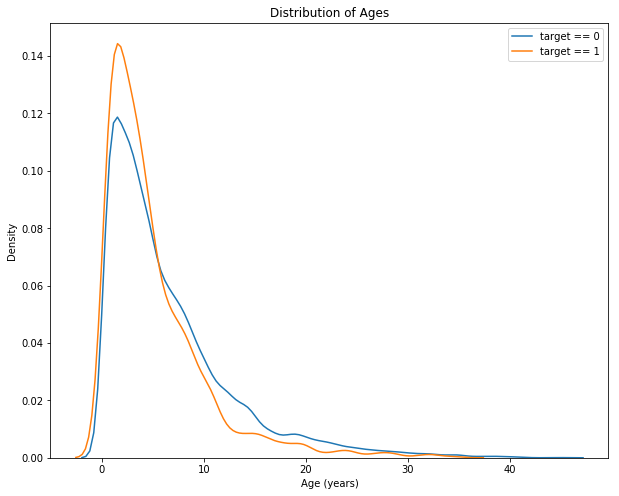

In [17]:
a = plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_EMPLOYED'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_EMPLOYED'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');


with open('kde1.pickle', 'wb') as pickle_file:
    pickle.dump(a, pickle_file)


In [18]:
# Employed year information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_EMPLOYED']]
age_data['DAYS_EMPLOYED'] = age_data['DAYS_EMPLOYED'] / 365

# Bin the employed year data
age_data['YEARS_BINNED'] = pd.cut(age_data['DAYS_EMPLOYED'], bins = np.linspace(0, 40, num = 9))
age_data.head(10)

,TARGET,DAYS_EMPLOYED,YEARS_BINNED
0,1,1.745205,"(0.0, 5.0]"
25,0,9.572603,"(5.0, 10.0]"
50,0,3.221918,"(0.0, 5.0]"
51,0,19.115068,"(15.0, 20.0]"
55,0,11.249315,"(10.0, 15.0]"
57,0,6.441096,"(5.0, 10.0]"
65,0,1.586301,"(0.0, 5.0]"
70,0,7.791781,"(5.0, 10.0]"
71,0,2.443836,"(0.0, 5.0]"
93,0,3.421918,"(0.0, 5.0]"


In [19]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_EMPLOYED
YEARS_BINNED,,
"(0.0, 5.0]",0.078840,2.381573
"(5.0, 10.0]",0.058508,7.227831
"(10.0, 15.0]",0.040570,12.183898
"(15.0, 20.0]",0.048628,17.304812
"(20.0, 25.0]",0.029312,22.221912
"(25.0, 30.0]",0.034722,27.267986
"(30.0, 35.0]",0.045249,32.245546
"(35.0, 40.0]",0.000000,37.158755


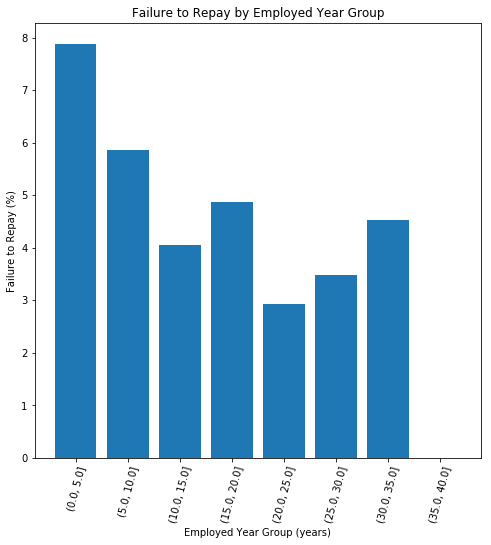

In [20]:
plt.figure(figsize = (8, 8))

# Graph the employed age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Employed Year Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Employed Year Group');

In [21]:
#Examine the Distribution of the Target Column
app_train['TARGET'].value_counts()

0    33882
1     2382
Name: TARGET, dtype: int64

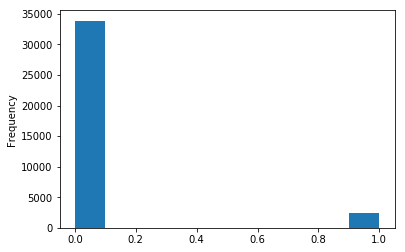

In [22]:
app_train['TARGET'].astype(int).plot.hist()

In [23]:
# The classes are heavily skewed we need to solve this issue later.
print('Pay', round(app_train['TARGET'].value_counts()[0]/len(app_train) * 100,2), '% of the dataset')
print('No Pay', round(app_train['TARGET'].value_counts()[1]/len(app_train) * 100,2), '% of the dataset')

Pay 93.43 % of the dataset
No Pay 6.57 % of the dataset


In [24]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [25]:
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 96 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [26]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    43
int64      38
object     15
dtype: int64

In [27]:
# Number of unique classes in each object column
print(app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0))

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               5
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             57
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64


In [28]:
# Number of unique classes in each object column
app_train.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

TARGET                             2
CNT_CHILDREN                       9
DAYS_BIRTH                     12458
DAYS_EMPLOYED                   7651
DAYS_ID_PUBLISH                 5731
FLAG_EMP_PHONE                     2
FLAG_WORK_PHONE                    2
FLAG_CONT_MOBILE                   2
FLAG_PHONE                         2
FLAG_EMAIL                         2
REGION_RATING_CLIENT               3
REGION_RATING_CLIENT_W_CITY        3
HOUR_APPR_PROCESS_START           24
REG_REGION_NOT_LIVE_REGION         2
REG_REGION_NOT_WORK_REGION         2
LIVE_REGION_NOT_WORK_REGION        2
REG_CITY_NOT_LIVE_CITY             2
REG_CITY_NOT_WORK_CITY             2
LIVE_CITY_NOT_WORK_CITY            2
FLAG_DOCUMENT_3                    2
FLAG_DOCUMENT_4                    2
FLAG_DOCUMENT_5                    2
FLAG_DOCUMENT_6                    2
FLAG_DOCUMENT_7                    2
FLAG_DOCUMENT_8                    2
FLAG_DOCUMENT_9                    2
FLAG_DOCUMENT_10                   2
F

In [29]:
# Number of unique classes in each object column
app_train.select_dtypes('float64').apply(pd.Series.nunique, axis = 0)

AMT_INCOME_TOTAL                  600
AMT_CREDIT                       3177
AMT_ANNUITY                      7958
AMT_GOODS_PRICE                   469
REGION_POPULATION_RELATIVE         79
DAYS_REGISTRATION               10876
CNT_FAM_MEMBERS                    10
EXT_SOURCE_1                    34654
EXT_SOURCE_2                    30103
EXT_SOURCE_3                      732
APARTMENTS_AVG                   1696
YEARS_BEGINEXPLUATATION_AVG       181
ELEVATORS_AVG                     194
ENTRANCES_AVG                     209
FLOORSMAX_AVG                     270
LIVINGAREA_AVG                   4166
NONLIVINGAREA_AVG                2342
APARTMENTS_MODE                   660
YEARS_BEGINEXPLUATATION_MODE      152
ELEVATORS_MODE                     26
ENTRANCES_MODE                     29
FLOORSMAX_MODE                     25
LIVINGAREA_MODE                  4198
NONLIVINGAREA_MODE               2363
APARTMENTS_MEDI                   972
YEARS_BEGINEXPLUATATION_MEDI      169
ELEVATORS_ME

In [30]:
#FEATURE LIST
list(app_train)

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LIVING

In [31]:
#creating new dataframe for correlation map(We picked the most correlated columns)
app_train1 = app_train[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','NAME_EDUCATION_TYPE',
                       'OCCUPATION_TYPE','CODE_GENDER','NAME_INCOME_TYPE','DAYS_BIRTH','DAYS_EMPLOYED',
                        'CNT_CHILDREN','AMT_INCOME_TOTAL']].copy()
app_train1.describe()

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED,CNT_CHILDREN,AMT_INCOME_TOTAL
count,36264.000000,36264.000000,36264.000000,36264.000000,36264.000000,36264.000000,36264.000000,3.626400e+04
mean,0.065685,0.506168,0.549828,0.494356,14299.107048,2368.465007,0.539902,1.936332e+05
std,0.247734,0.205886,0.174524,0.194336,3366.730682,2259.202504,0.755866,1.145574e+05
min,0.000000,0.014691,0.000010,0.000527,7680.000000,4.000000,0.000000,2.700000e+04
25%,0.000000,0.344601,0.458488,0.352340,11628.000000,780.000000,0.000000,1.260000e+05
50%,0.000000,0.510588,0.596036,0.513694,14004.000000,1669.000000,0.000000,1.710000e+05
75%,0.000000,0.672684,0.680748,0.651260,16627.000000,3189.000000,1.000000,2.250000e+05
max,1.000000,0.941986,0.855000,0.887664,25017.000000,16495.000000,19.000000,4.500000e+06


In [32]:
missing_values = missing_values_table(app_train1)
missing_values.head()

Your selected dataframe has 12 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [33]:
app_train1.head()

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,CODE_GENDER,NAME_INCOME_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_CHILDREN,AMT_INCOME_TOTAL
0,1,0.083037,0.262949,0.139376,Secondary / secondary special,Laborers,M,Working,9461,637,0,202500.0
25,0,0.561948,0.651406,0.461482,Secondary / secondary special,Cleaning staff,F,Working,19334,3494,0,90000.0
50,0,0.656225,0.450850,0.479449,Higher education,Core staff,F,State servant,12406,1176,0,54000.0
51,0,0.311510,0.713355,0.309275,Higher education,Managers,M,Commercial associate,18632,6977,1,540000.0
55,0,0.552772,0.616637,0.070109,Higher education,Managers,F,Working,12955,4106,0,180000.0


In [34]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

5 columns were label encoded.


In [35]:
# Create a label encoder object for the subsample
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train1:
    if app_train1[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train1[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train1[col])
            # Transform both training and testing data
            app_train1[col] = le.transform(app_train1[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

1 columns were label encoded.


In [36]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)


print('Training Features shape: ', app_train.shape)

Training Features shape:  (36264, 206)


In [37]:
# one-hot encoding of categorical variables in the subsample
app_train1 = pd.get_dummies(app_train1)


print('Training Features shape: ', app_train1.shape)

Training Features shape:  (36264, 37)


In [38]:
with open('app_train1.pickle', 'wb') as pickle_file:
    pickle.dump(app_train1, pickle_file)

with open('app_train.pickle', 'wb') as pickle_file:
    pickle.dump(app_train, pickle_file)

In [39]:
###FEATURE ENGINEERING

In [40]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_EMPLOYED', 'TARGET']].copy()


poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])


from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [41]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)

print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (36264, 35)


In [42]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_EMPLOYED'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_EMPLOYED',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_EMPLOYED',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_EMPLOYED',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_EMPLOYED',
 'DAYS_EMPLOYED^2']

In [43]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_EMPLOYED']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2                  -0.034126
EXT_SOURCE_2^2                -0.028893
EXT_SOURCE_2^3                -0.024182
EXT_SOURCE_1 EXT_SOURCE_2     -0.022430
EXT_SOURCE_1^2                -0.019809
EXT_SOURCE_1 EXT_SOURCE_2^2   -0.019578
EXT_SOURCE_1                  -0.019367
EXT_SOURCE_1^3                -0.018890
EXT_SOURCE_1^2 EXT_SOURCE_2   -0.016569
EXT_SOURCE_2 EXT_SOURCE_3     -0.013257
Name: TARGET, dtype: float64
EXT_SOURCE_3^2                 0.002278
EXT_SOURCE_3^3                 0.005731
EXT_SOURCE_1 EXT_SOURCE_3^2    0.006828
TARGET                         1.000000
1                                   NaN
Name: TARGET, dtype: float64


In [44]:
app_train_x = app_train.copy()


app_train_x.reset_index(drop=True, inplace=True)
poly_features.reset_index(drop=True, inplace=True)

poly_features.drop( 'TARGET', inplace=True, axis=1)

app_train_poly = pd.concat( [app_train_x, poly_features], axis=1) 

app_train_poly.drop( ["1"], inplace=True, axis=1)

app_train_poly.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,EXT_SOURCE_2^3,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2^2 DAYS_EMPLOYED,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_EMPLOYED,EXT_SOURCE_2 DAYS_EMPLOYED^2,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_EMPLOYED,EXT_SOURCE_3 DAYS_EMPLOYED^2,DAYS_EMPLOYED^3
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0.018181,0.009637,44.043430,0.005108,23.345200,1.066964e+05,0.002707,12.374112,5.655437e+04,2.584749e+08
1,0,0,0,0,1,0,90000.0,225000.0,11074.5,225000.0,...,0.276410,0.195821,1482.606586,0.138727,1050.339135,7.952383e+06,0.098280,744.103195,5.633794e+06,4.265488e+10
2,0,1,0,0,1,0,54000.0,135000.0,6750.0,135000.0,...,0.091642,0.097455,239.040195,0.103637,254.203502,6.235143e+05,0.110212,270.328679,6.630664e+05,1.626380e+09
3,0,0,1,1,1,1,540000.0,675000.0,34596.0,675000.0,...,0.363008,0.157382,3550.419227,0.068233,1539.286623,3.472505e+07,0.029583,667.358742,1.505507e+07,3.396301e+11
4,0,0,0,0,1,0,180000.0,837427.5,45558.0,666000.0,...,0.234471,0.026658,1561.271807,0.003031,177.509474,1.039603e+07,0.000345,20.182016,1.181982e+06,6.922402e+10


In [45]:
with open('app_train_poly.pickle', 'wb') as pickle_file:
    pickle.dump(app_train_poly, pickle_file)

In [46]:
list(app_train_poly)

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE

In [47]:
#shape of polynomial data
app_train_poly.shape

(36264, 240)

In [48]:
#checked for possible null values
app_train_poly.isnull().sum().max()

0

In [49]:
app_train_poly.describe()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,EXT_SOURCE_2^3,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2^2 DAYS_EMPLOYED,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_EMPLOYED,EXT_SOURCE_2 DAYS_EMPLOYED^2,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_EMPLOYED,EXT_SOURCE_3 DAYS_EMPLOYED^2,DAYS_EMPLOYED^3
count,36264.000000,36264.000000,36264.000000,36264.000000,36264.000000,36264.000000,3.626400e+04,3.626400e+04,36264.000000,3.626400e+04,...,3.626400e+04,3.626400e+04,3.626400e+04,3.626400e+04,36264.000000,3.626400e+04,3.626400e+04,36264.000000,3.626400e+04,3.626400e+04
mean,0.065685,0.107490,0.334078,0.385286,0.680261,0.539902,1.936332e+05,6.481078e+05,29251.634389,5.859193e+05,...,2.110321e-01,1.683318e-01,8.185064e+02,1.587867e-01,697.756752,6.111944e+06,1.744880e-01,719.469973,5.712619e+06,7.130592e+10
std,0.247734,0.309739,0.471674,0.486669,0.466382,0.755866,1.145574e+05,4.339080e+05,15520.462150,4.002188e+05,...,1.340919e-01,1.129190e-01,9.741261e+02,1.208665e-01,867.641127,1.342701e+07,1.517982e-01,970.658799,1.295953e+07,2.432457e+11
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.700000e+04,4.500000e+04,2317.500000,4.500000e+04,...,1.096162e-15,2.802888e-11,1.976344e-07,1.716349e-10,0.000905,6.102899e+00,1.465843e-10,0.000032,6.852339e+00,6.400000e+01
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.260000e+05,2.909250e+05,17950.500000,2.700000e+05,...,9.637918e-02,7.304158e-02,1.668056e+02,5.574566e-02,136.603487,2.795040e+05,4.374070e-02,111.186172,2.326334e+05,4.745520e+08
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.710000e+05,5.430375e+05,26653.500000,4.545000e+05,...,2.117476e-01,1.557679e-01,4.841073e+02,1.349470e-01,390.169539,1.430983e+06,1.355542e-01,359.589020,1.242583e+06,4.649101e+09
75%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.250000e+05,9.000000e+05,37395.000000,7.931250e+05,...,3.154706e-01,2.493337e-01,1.104948e+03,2.424716e-01,918.329181,5.582900e+06,2.762254e-01,929.464904,5.039568e+06,3.243124e+10
max,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,4.500000e+06,4.050000e+06,258025.500000,4.050000e+06,...,6.250256e-01,5.901370e-01,9.418351e+03,6.141858e-01,8855.683866,1.842438e+08,6.994330e-01,10001.767508,1.792457e+08,4.488042e+12


In [50]:
missing_values = missing_values_table(app_train_poly)
missing_values.head()

Your selected dataframe has 240 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [51]:
#Splitting the Data (Polynomial DataFrame)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

print('Pay', round(app_train_poly['TARGET'].value_counts()[0]/len(app_train_poly) * 100,2), '% of the dataset')
print('No Pay', round(app_train_poly['TARGET'].value_counts()[1]/len(app_train_poly) * 100,2), '% of the dataset')

X_poly = app_train_poly.drop('TARGET', axis=1)
y_poly = app_train_poly['TARGET']

sss_poly = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index_poly, test_index_poly in sss_poly.split(X_poly, y_poly):
    print("Train:", train_index_poly, "Test:", test_index_poly)
    original_Xtrain_poly, original_Xtest_poly = X_poly.iloc[train_index_poly], X_poly.iloc[test_index_poly]
    original_ytrain_poly, original_ytest_poly = y_poly.iloc[train_index_poly], y_poly.iloc[test_index_poly]

# We already have X_train and y_train for undersample data thats why we are using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain_poly = original_Xtrain_poly.values
original_Xtest_poly = original_Xtest_poly.values
original_ytrain_poly = original_ytrain_poly.values
original_ytest_poly = original_ytest_poly.values

# See if both the train and test label distribution are similarly distributed
train_unique_label_poly, train_counts_label_poly = np.unique(original_ytrain_poly, return_counts=True)
test_unique_label_poly, test_counts_label_poly = np.unique(original_ytest_poly, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label_poly/ len(original_ytrain_poly))
print(test_counts_label_poly/ len(original_ytest_poly))

Pay 93.43 % of the dataset
No Pay 6.57 % of the dataset
Train: [ 7232  7233  7234 ... 36261 36262 36263] Test: [   0    1    2 ... 7563 7565 7572]
Train: [    0     1     2 ... 36261 36262 36263] Test: [ 7232  7233  7234 ... 15133 15136 15146]
Train: [    0     1     2 ... 36261 36262 36263] Test: [14465 14466 14467 ... 21877 21896 21924]
Train: [    0     1     2 ... 36261 36262 36263] Test: [21747 21748 21749 ... 29019 29020 29021]
Train: [    0     1     2 ... 29019 29020 29021] Test: [28887 28889 28913 ... 36261 36262 36263]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.93430305 0.06569695]
[0.93436293 0.06563707]


In [52]:
#Splitting the Data (Original DataFrame)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

print('Pay', round(app_train['TARGET'].value_counts()[0]/len(app_train) * 100,2), '% of the dataset')
print('No Pay', round(app_train['TARGET'].value_counts()[1]/len(app_train) * 100,2), '% of the dataset')

X = app_train.drop('TARGET', axis=1)
y = app_train['TARGET']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why we are using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Pay 93.43 % of the dataset
No Pay 6.57 % of the dataset
Train: [ 7232  7233  7234 ... 36261 36262 36263] Test: [   0    1    2 ... 7563 7565 7572]
Train: [    0     1     2 ... 36261 36262 36263] Test: [ 7232  7233  7234 ... 15133 15136 15146]
Train: [    0     1     2 ... 36261 36262 36263] Test: [14465 14466 14467 ... 21877 21896 21924]
Train: [    0     1     2 ... 36261 36262 36263] Test: [21747 21748 21749 ... 29019 29020 29021]
Train: [    0     1     2 ... 29019 29020 29021] Test: [28887 28889 28913 ... 36261 36262 36263]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.93430305 0.06569695]
[0.93436293 0.06563707]


In [53]:
#Splitting the Data (SUBSAMPLE DataFrame)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

print('Pay', round(app_train1['TARGET'].value_counts()[0]/len(app_train1) * 100,2), '% of the dataset')
print('No Pay', round(app_train1['TARGET'].value_counts()[1]/len(app_train1) * 100,2), '% of the dataset')

A = app_train1.drop('TARGET', axis=1)
B = app_train1['TARGET']

ttt = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index1, test_index1 in ttt.split(A, B):
    print("Train:", train_index1, "Test:", test_index1)
    original_Atrain, original_Atest = A.iloc[train_index1], A.iloc[test_index1]
    original_Btrain, original_Btest = B.iloc[train_index1], B.iloc[test_index1]

# We already have X_train and y_train for undersample data thats why we are using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Atrain = original_Atrain.values
original_Atest = original_Atest.values
original_Btrain = original_Btrain.values
original_Btest = original_Btest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label1, train_counts_label1 = np.unique(original_Btrain, return_counts=True)
test_unique_label1, test_counts_label1 = np.unique(original_Btest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label1/ len(original_Btrain))
print(test_counts_label1/ len(original_Btest))

Pay 93.43 % of the dataset
No Pay 6.57 % of the dataset
Train: [ 7232  7233  7234 ... 36261 36262 36263] Test: [   0    1    2 ... 7563 7565 7572]
Train: [    0     1     2 ... 36261 36262 36263] Test: [ 7232  7233  7234 ... 15133 15136 15146]
Train: [    0     1     2 ... 36261 36262 36263] Test: [14465 14466 14467 ... 21877 21896 21924]
Train: [    0     1     2 ... 36261 36262 36263] Test: [21747 21748 21749 ... 29019 29020 29021]
Train: [    0     1     2 ... 29019 29020 29021] Test: [28887 28889 28913 ... 36261 36262 36263]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.93430305 0.06569695]
[0.93436293 0.06563707]


In [54]:
with open('original_Xtrain.pickle', 'wb') as pickle_file:
    pickle.dump(original_Xtrain, pickle_file)
with open('original_Xtest.pickle', 'wb') as pickle_file:
    pickle.dump(original_Xtest, pickle_file)
with open('original_ytrain.pickle', 'wb') as pickle_file:
    pickle.dump(original_ytrain, pickle_file)
with open('original_ytest.pickle', 'wb') as pickle_file:
    pickle.dump(original_ytest, pickle_file)


In [55]:
app_train['TARGET'].value_counts()

0    33882
1     2382
Name: TARGET, dtype: int64

In [56]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples of subsample.

app_train1 = app_train1.sample(frac=1)

# amount of nonpayer classes 2382 rows.
pay_app_train1 = app_train1.loc[app_train1['TARGET'] == 0][:2382]
non_pay_app_train1 = app_train1.loc[app_train1['TARGET'] == 1]

normal_distributed_app_train1 = pd.concat([non_pay_app_train1, pay_app_train1])

# Shuffle dataframe rows
new_app_train1 = normal_distributed_app_train1.sample(frac=1, random_state=42)

new_app_train1.head()

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,CODE_GENDER,DAYS_BIRTH,DAYS_EMPLOYED,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE_Academic degree,...,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working
162554,1,0.613599,0.540467,0.345785,0,11082,888,0,81000.0,0,...,0,0,0,0,0,0,1,0,0,0
81013,1,0.230081,0.398197,0.678568,0,11208,750,0,90000.0,0,...,0,1,0,0,0,0,0,0,0,1
281578,1,0.133587,0.779229,0.424130,0,15401,253,0,135000.0,0,...,0,0,0,0,0,0,0,0,0,1
144193,0,0.836298,0.667327,0.336062,0,16712,2140,0,135000.0,0,...,0,0,0,0,0,0,0,0,0,1
221080,1,0.719120,0.527702,0.372334,0,11948,1036,2,112500.0,0,...,0,0,0,0,0,0,1,0,0,0


In [57]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples of polynomial dataframe

app_train_poly = app_train_poly.sample(frac=1)

# amount of nonpayer classes 2382 rows.
pay_app_train_poly = app_train_poly.loc[app_train_poly['TARGET'] == 0][:2382]
non_pay_app_train_poly = app_train_poly.loc[app_train_poly['TARGET'] == 1]

normal_distributed_app_train_poly = pd.concat([non_pay_app_train_poly, pay_app_train_poly])

# Shuffle dataframe rows
new_app_train_poly = normal_distributed_app_train_poly.sample(frac=1, random_state=42)

new_app_train_poly.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,EXT_SOURCE_2^3,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2^2 DAYS_EMPLOYED,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_EMPLOYED,EXT_SOURCE_2 DAYS_EMPLOYED^2,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_EMPLOYED,EXT_SOURCE_3 DAYS_EMPLOYED^2,DAYS_EMPLOYED^3
16325,1,0,0,0,0,1,45000.0,298512.0,17266.5,270000.0,...,0.280512,0.264748,91.702461,0.249871,86.549321,2.997859e+04,0.235830,81.685758,2.829397e+04,9.800344e+06
18426,1,0,1,1,1,0,540000.0,1159515.0,30586.5,1012500.0,...,0.095404,0.097477,45.307692,0.099595,46.292030,2.151670e+04,0.101759,47.297754,2.198416e+04,1.021831e+07
35093,1,0,1,1,1,0,315000.0,685386.0,54279.0,585000.0,...,0.101462,0.063001,574.299310,0.039120,356.604255,3.250686e+06,0.024291,221.429127,2.018474e+06,1.839974e+10
8703,0,1,0,0,1,2,90000.0,180000.0,9000.0,180000.0,...,0.081640,0.154189,49.118177,0.291209,92.767041,2.955166e+04,0.549993,175.204467,5.581274e+04,1.777958e+07
19426,1,0,0,1,1,0,85500.0,545040.0,25537.5,450000.0,...,0.004362,0.001297,8.863515,0.000386,2.635912,1.800985e+04,0.000115,0.783891,5.355932e+03,3.659437e+07


In [58]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples of original dataframe.

app_train = app_train.sample(frac=1)

# amount of nonpayer classes 2382 rows.
pay_app_train = app_train.loc[app_train['TARGET'] == 0][:2382]
non_pay_app_train = app_train.loc[app_train['TARGET'] == 1]

normal_distributed_app_train = pd.concat([non_pay_app_train, pay_app_train])

# Shuffle dataframe rows
new_app_train = normal_distributed_app_train.sample(frac=1, random_state=42)

new_app_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
221736,1,0,0,1,1,1,198000.0,688090.5,23647.5,594000.0,...,1,0,0,0,0,0,0,1,0,0
294433,1,0,1,1,1,0,135000.0,1046142.0,30717.0,913500.0,...,1,0,0,0,0,0,0,0,1,0
23287,1,0,0,0,0,1,112500.0,270000.0,14647.5,270000.0,...,1,0,0,0,0,0,0,1,0,0
267907,0,0,0,0,1,0,157500.0,835380.0,36927.0,675000.0,...,1,0,0,0,0,0,0,0,1,0
16051,1,0,1,0,1,0,135000.0,247275.0,22810.5,225000.0,...,1,0,0,0,0,0,0,1,0,0


In [59]:
with open('new_app_train1.pickle', 'wb') as pickle_file:
    pickle.dump(new_app_train1, pickle_file)

with open('new_app_train.pickle', 'wb') as pickle_file:
    pickle.dump(new_app_train, pickle_file)
    
with open('new_app_train_poly.pickle', 'wb') as pickle_file:
    pickle.dump(new_app_train_poly, pickle_file)

Distribution of the TARGET in the subsample dataset
1    0.5
0    0.5
Name: TARGET, dtype: float64


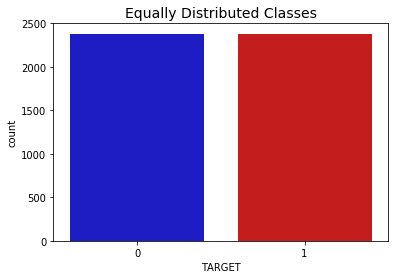

In [60]:
print('Distribution of the TARGET in the subsample dataset')
print(new_app_train1['TARGET'].value_counts()/len(new_app_train1))
colors = ["#0101DF", "#DF0101"]
sns.countplot('TARGET', data=new_app_train1, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

Distribution of the TARGET in the Imbalanced dataset
0    0.934315
1    0.065685
Name: TARGET, dtype: float64


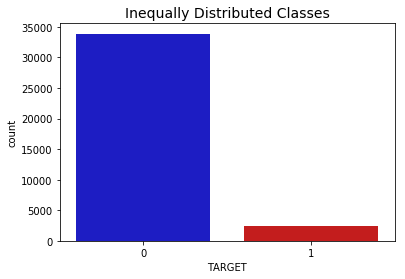

In [61]:
print('Distribution of the TARGET in the Imbalanced dataset')
print(app_train['TARGET'].value_counts()/len(app_train))
colors = ["#0101DF", "#DF0101"]
sns.countplot('TARGET', data=app_train, palette=colors)
plt.title('Inequally Distributed Classes', fontsize=14)
plt.show()

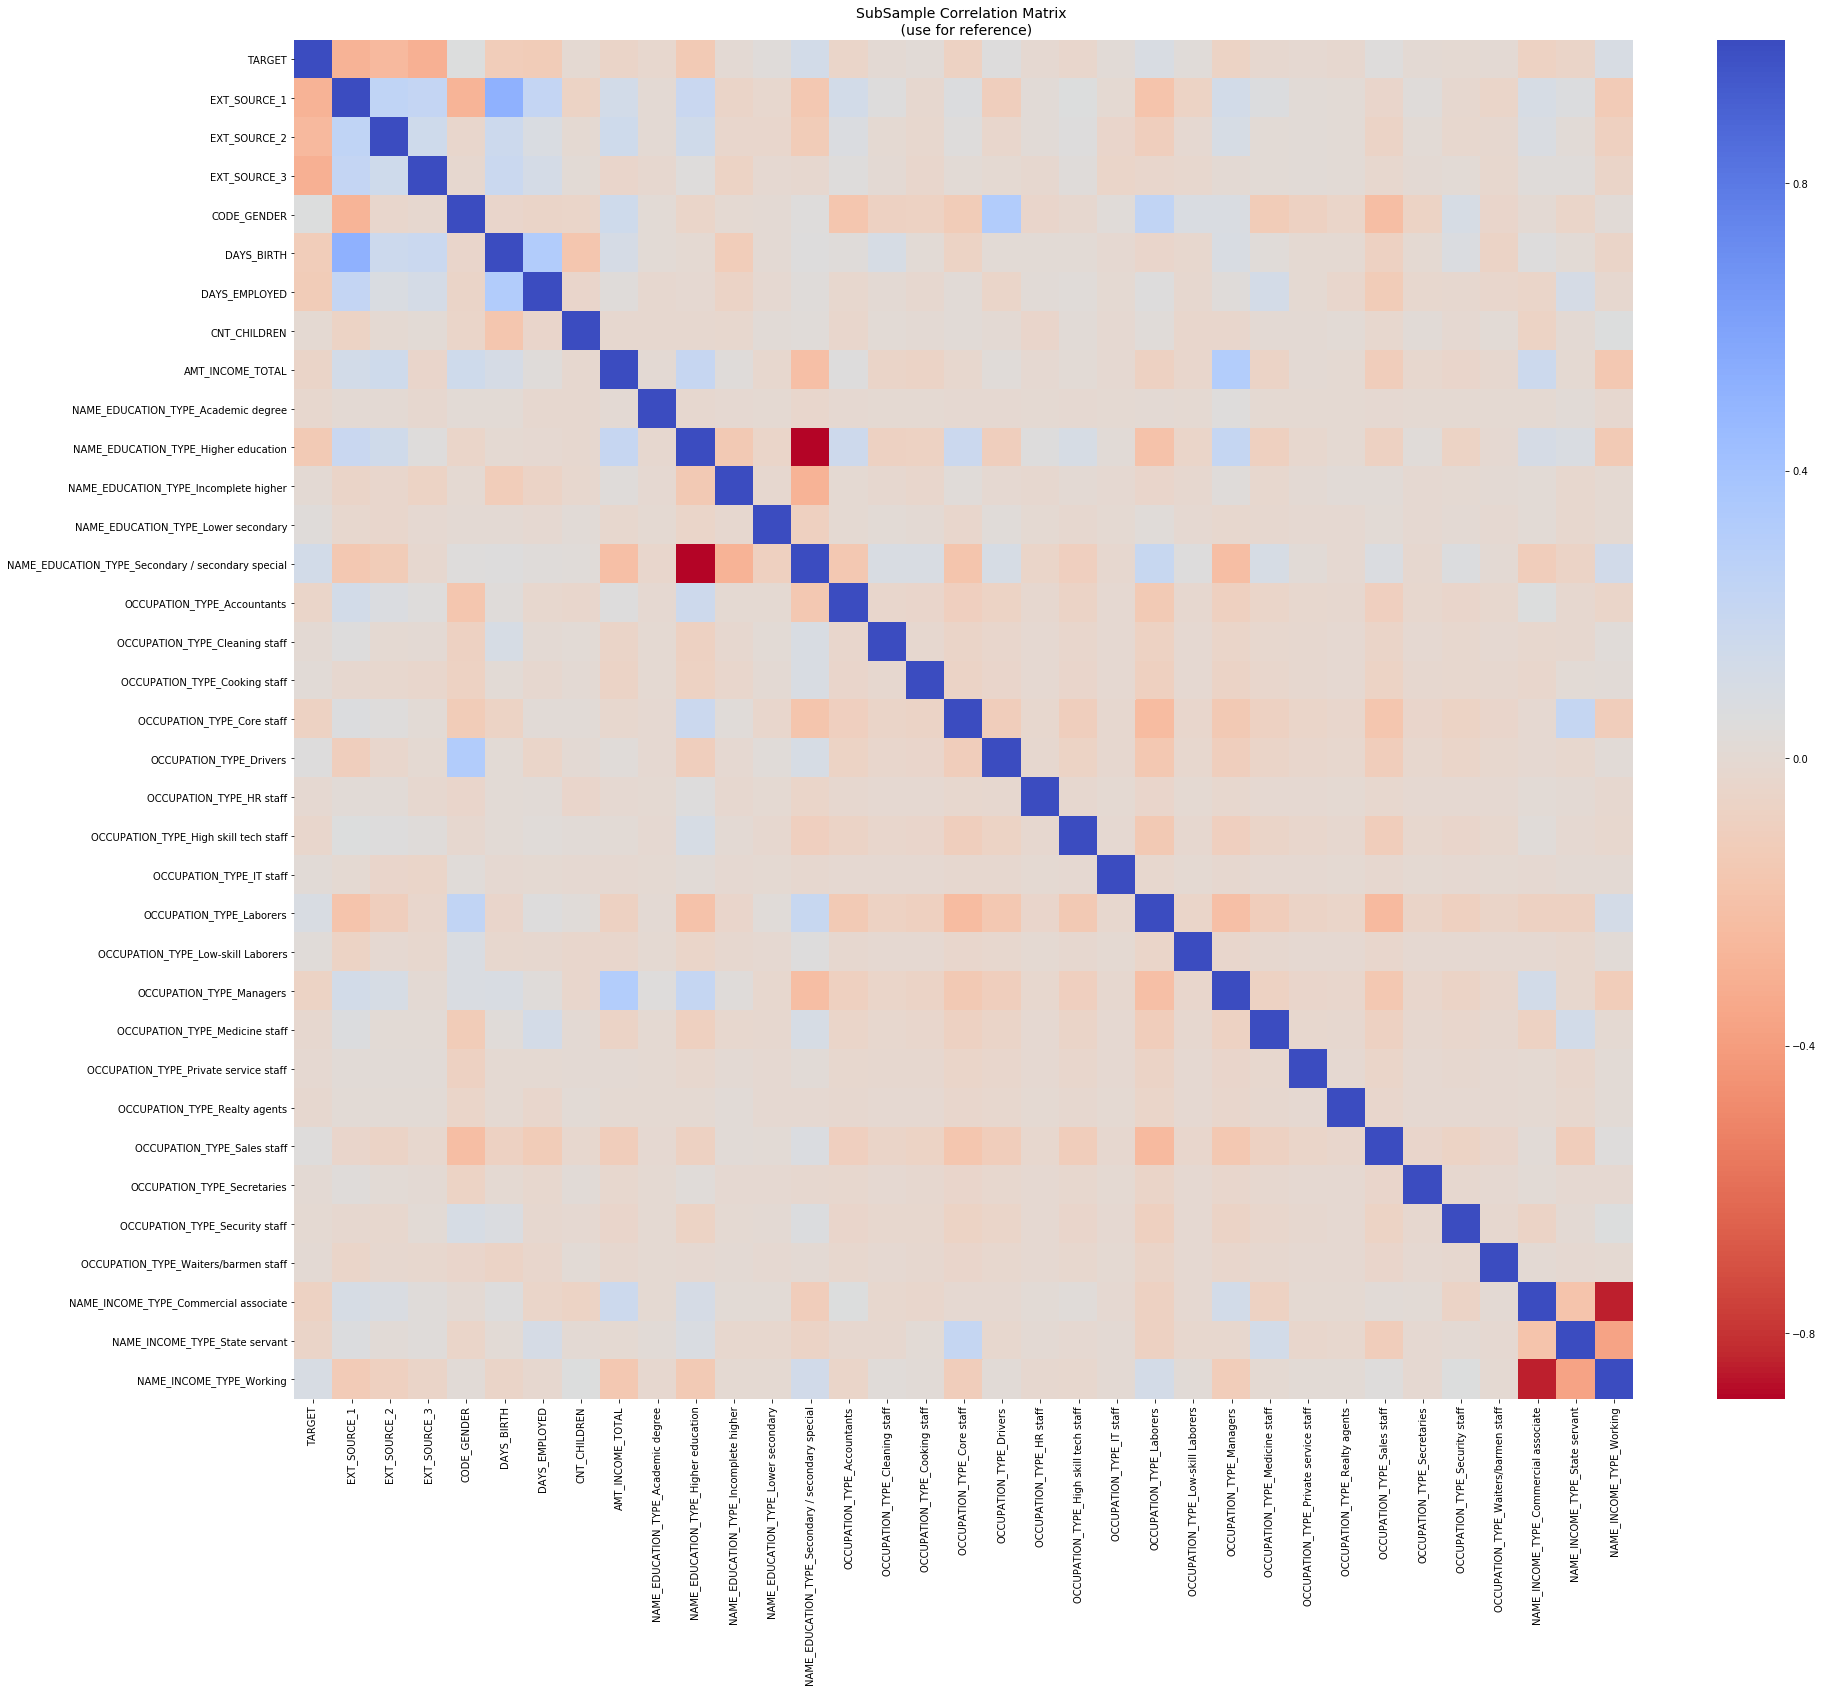

In [62]:
# Make sure we use the subsample in our correlation

f, ax1 = plt.subplots(1, 1, figsize=(30,25))

new_app_train1_heat = new_app_train1.copy()

new_app_train1_heat.drop( ['NAME_INCOME_TYPE_Businessman','NAME_INCOME_TYPE_Student'], inplace=True, axis=1)

sub_sample1_corr = new_app_train1_heat.corr()
sns.heatmap(sub_sample1_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

    

with open('heatmap.pickle', 'wb') as pickle_file:
    pickle.dump(f, pickle_file)
    


In [63]:
new_app_train1["NAME_EDUCATION_TYPE_Academic degree"].sum()

3

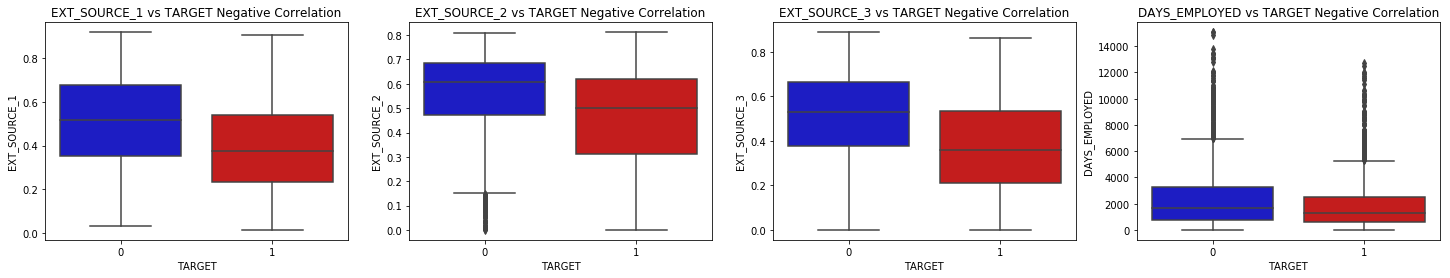

In [64]:

###Drawing Box-Plots

f, axes = plt.subplots(ncols=4, figsize=(25,4))

# Negative Correlations with our Target
sns.boxplot(x="TARGET", y="EXT_SOURCE_1", data=new_app_train, palette=colors, ax=axes[0])
axes[0].set_title('EXT_SOURCE_1 vs TARGET Negative Correlation')

sns.boxplot(x="TARGET", y="EXT_SOURCE_2", data=new_app_train, palette=colors, ax=axes[1])
axes[1].set_title('EXT_SOURCE_2 vs TARGET Negative Correlation')


sns.boxplot(x="TARGET", y="EXT_SOURCE_3", data=new_app_train, palette=colors, ax=axes[2])
axes[2].set_title('EXT_SOURCE_3 vs TARGET Negative Correlation')


sns.boxplot(x="TARGET", y="DAYS_EMPLOYED", data=new_app_train1, palette=colors, ax=axes[3])
axes[3].set_title('DAYS_EMPLOYED vs TARGET Negative Correlation')

plt.show()

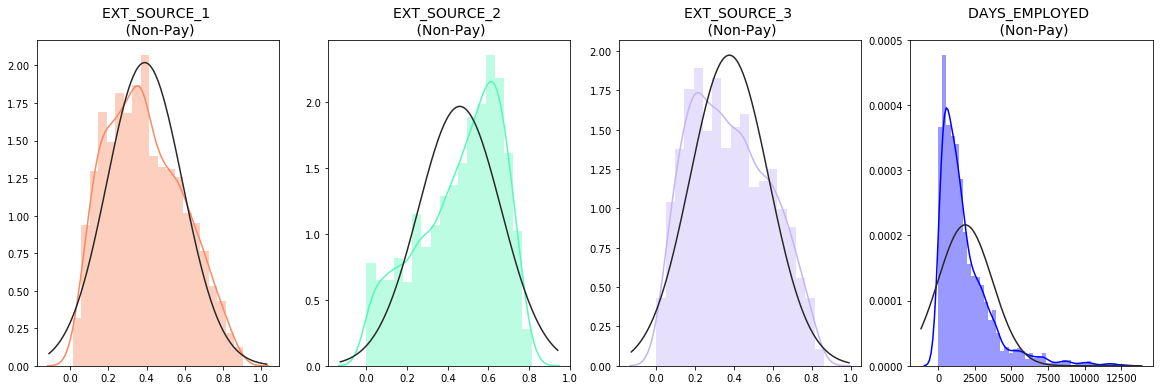

In [65]:

###Let's visualize the EXT_SOURCE distribution of non-payer people

from scipy.stats import norm

f, (ax1, ax2, ax3 , ax4) = plt.subplots(1,4, figsize=(20, 6))

ext_s1_nonpay = new_app_train['EXT_SOURCE_1'].loc[new_app_train['TARGET'] == 1].values
sns.distplot(ext_s1_nonpay,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('EXT_SOURCE_1 \n (Non-Pay)', fontsize=14)

ext_s2_nonpay = new_app_train['EXT_SOURCE_2'].loc[new_app_train['TARGET'] == 1].values
sns.distplot(ext_s2_nonpay,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('EXT_SOURCE_2 \n (Non-Pay)', fontsize=14)


ext_s2_nonpay = new_app_train['EXT_SOURCE_3'].loc[new_app_train['TARGET'] == 1].values
sns.distplot(ext_s2_nonpay,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('EXT_SOURCE_3 \n (Non-Pay)', fontsize=14)


days_emp_nonpay = new_app_train['DAYS_EMPLOYED'].loc[new_app_train['TARGET'] == 1].values
sns.distplot(days_emp_nonpay,ax=ax4, fit=norm, color='b')
ax4.set_title('DAYS_EMPLOYED \n (Non-Pay)', fontsize=14)

plt.show()

In [66]:
###Domain Knowledge Features
#We created new columns which might be important to analyze our model.

app_train_domain = new_app_train.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

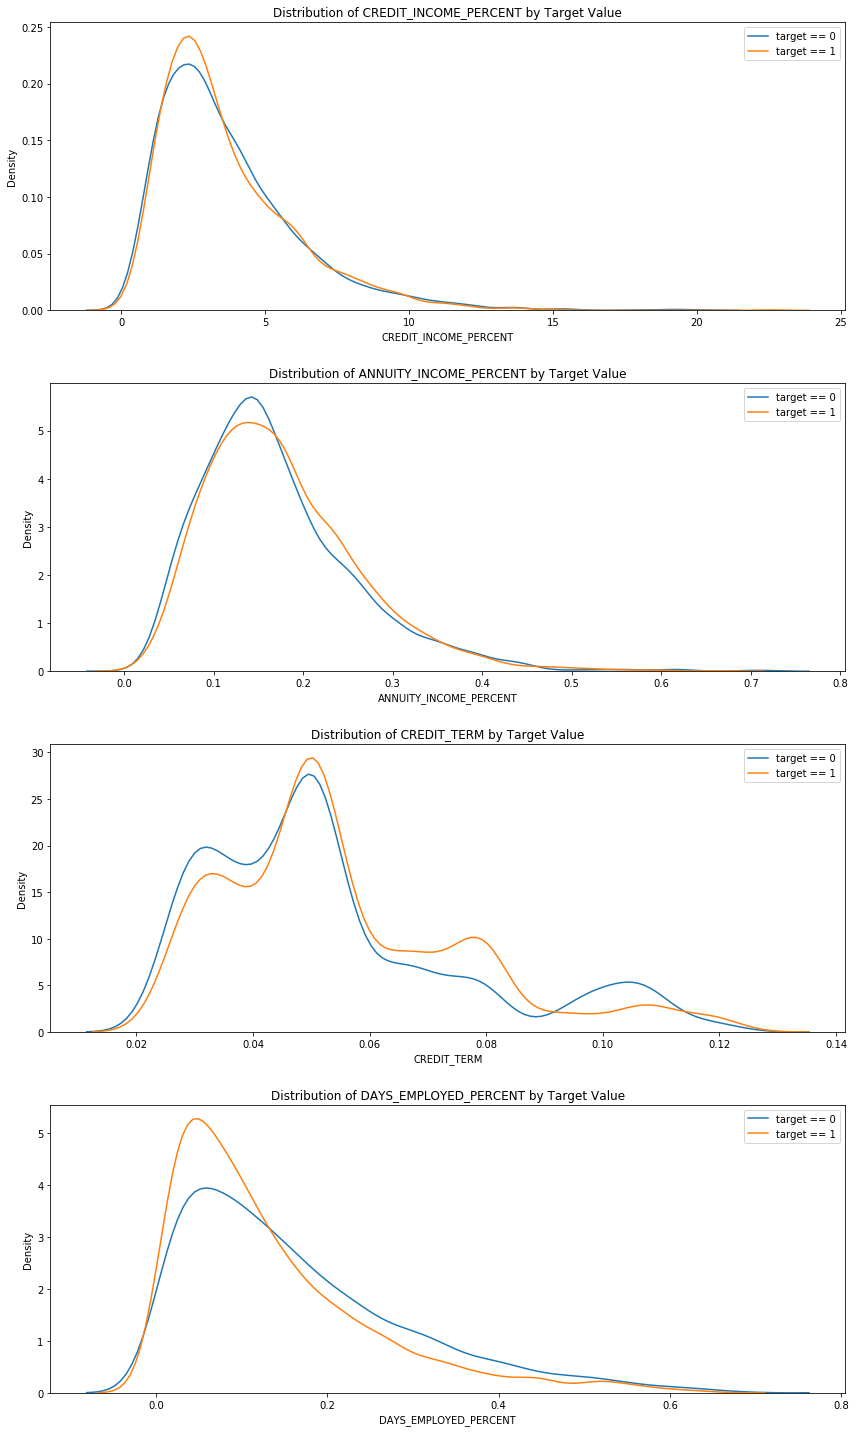

In [67]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

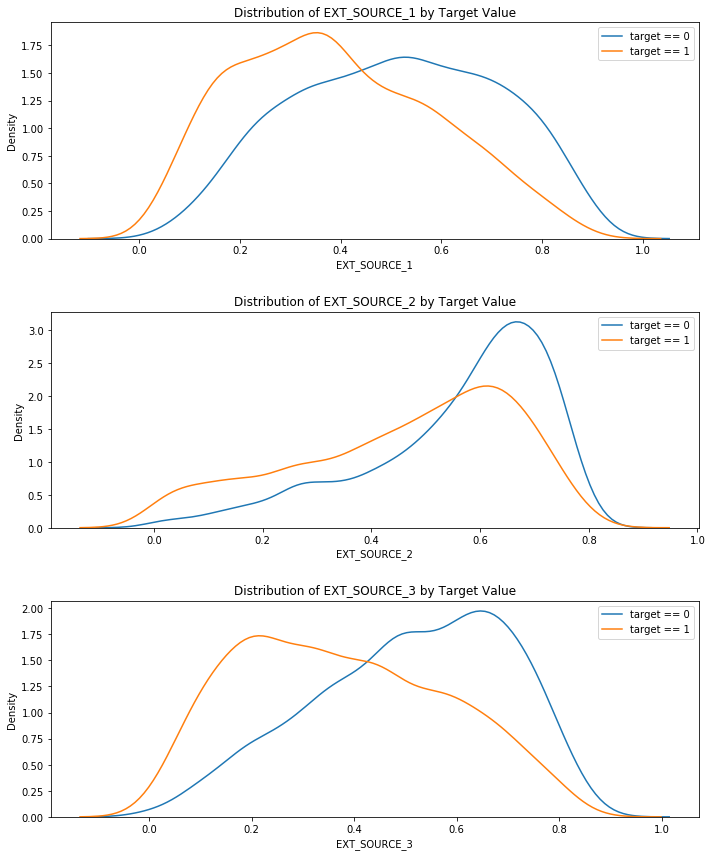

In [68]:

###we looked at the distribution of each of EXT_SOURCE features colored by the value of the target


plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(new_app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(new_app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

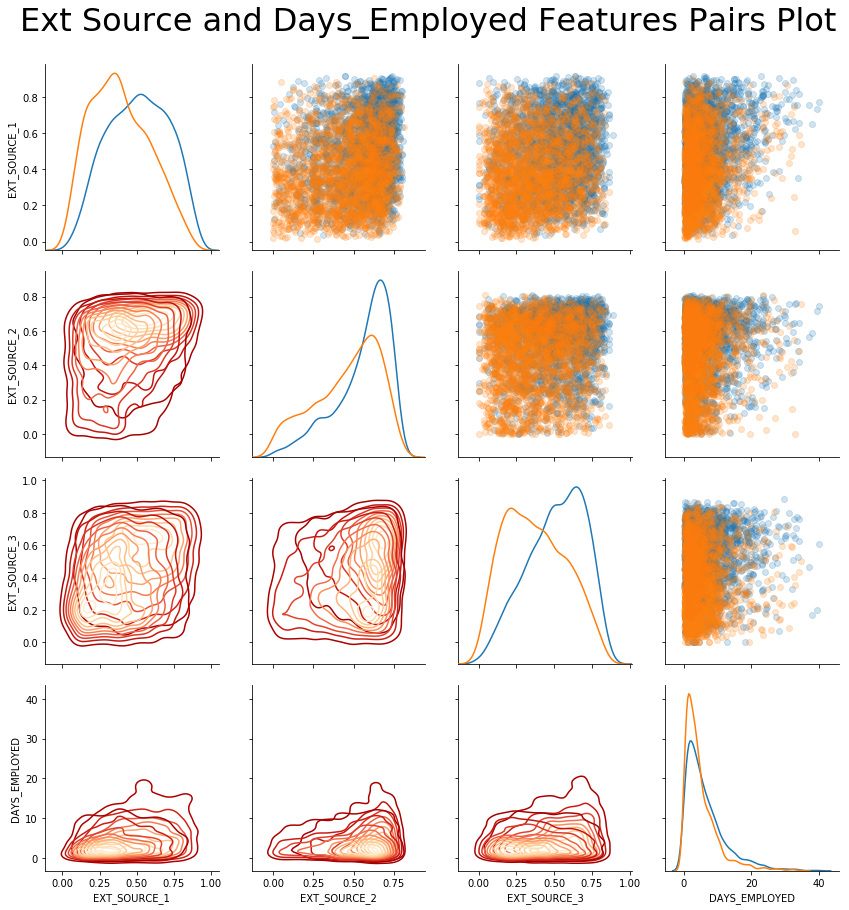

In [69]:
###Drawing pair plot to analyze properties.

# Copy the data for pair plotting

plot_data = new_app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].copy()


# Add in the age of the client in years
plot_data['DAYS_EMPLOYED'] = age_data['DAYS_EMPLOYED']

"""# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]"""

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                height = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, height = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Days_Employed Features Pairs Plot', size = 32, y = 1.05);



with open('pairplot.pickle', 'wb') as pickle_file:
    pickle.dump(grid, pickle_file)

In [70]:
###Dimensionality Reduction and Clustering:

# new_app_train is from the random undersample data (fewer instances)

X = new_app_train.drop('TARGET', axis=1)
y = new_app_train['TARGET']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

with open('X_reduced_tsne.pickle', 'wb') as pickle_file:
    pickle.dump(X_reduced_tsne, pickle_file)
    
with open('X_reduced_pca.pickle', 'wb') as pickle_file:
    pickle.dump(X_reduced_pca, pickle_file)
    
with open('X_reduced_svd.pickle', 'wb') as pickle_file:
    pickle.dump(X_reduced_svd, pickle_file)

T-SNE took 5.9e+01 s
PCA took 1.6 s
Truncated SVD took 0.047 s


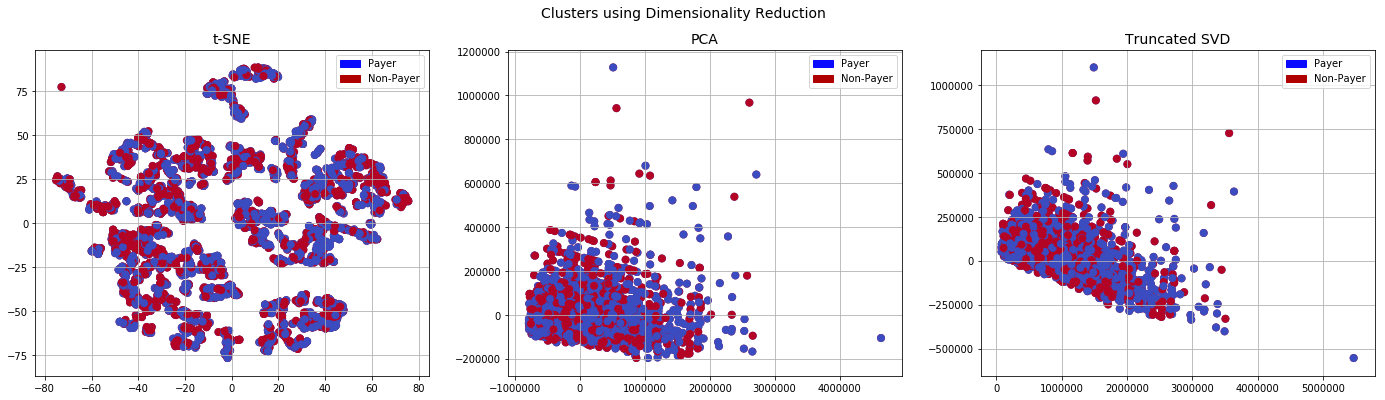

In [72]:
###Let's visualize it on a plot 


f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['Payer', 'Nonpayer']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Payer')
red_patch = mpatches.Patch(color='#AF0000', label='Non-Payer')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Payer', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Non-Payer', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Payer', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Non-Payer', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Payer', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Non-Payer', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()



In [73]:
######Classifiers (UnderSampling)#######

In [74]:
# Undersampling before cross validating (prone to overfit)
X = new_app_train.drop('TARGET', axis=1)
y = new_app_train['TARGET']

In [75]:
# Undersampling before cross validating (prone to overfit)
X_poly = new_app_train_poly.drop('TARGET', axis=1)
y_poly = new_app_train_poly['TARGET']

In [76]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

In [77]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

X_train_poly = X_train_poly.values
X_test_poly = X_test_poly.values
y_train_poly = y_train_poly.values
y_test_poly = y_test_poly.values

In [78]:
# Let's implement simple classifiers

classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

In [79]:
# applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print( classifier.__class__.__name__, " Cross Validation Score:", round(training_score.mean(), 2) * 100, "% ")
    
RandomForestClassifier().fit(X_train_poly, y_train_poly)
training_score_poly = cross_val_score(RandomForestClassifier(), X_train_poly, y_train_poly, cv=5)
print( "RandomForestClassifier on Polynomial Feature", " Cross Validation Score:", round(training_score_poly.mean(), 2) * 100, "% ")

LogisticRegression  Cross Validation Score: 56.99999999999999 % 
KNeighborsClassifier  Cross Validation Score: 53.0 % 
RandomForestClassifier  Cross Validation Score: 62.0 % 
RandomForestClassifier on Polynomial Feature  Cross Validation Score: 63.0 % 


In [80]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_


knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

#Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_split=1e-07, min_samples_leaf=1, min_samples_split=2, 
                       min_weight_fraction_leaf=0.0,n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rf.fit(X_train, y_train)
#Random forest best estimator
random_forest=CV_rf.best_estimator_

y_pred = rf.predict(X_test)

#Random Forest Poly 
rfp = RandomForestClassifier()
rfp.fit(X_train_poly, y_train_poly)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_split=1e-07, min_samples_leaf=1, min_samples_split=2, 
                       min_weight_fraction_leaf=0.0,n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfp = GridSearchCV(estimator=rfp, param_grid=param_grid, cv= 5)
CV_rfp.fit(X_train_poly, y_train_poly)
#Random forest on poly best estimator
random_forest_poly=CV_rfp.best_estimator_

y_pred_poly = rfp.predict(X_test_poly)

In [81]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

random_forest_score=cross_val_score(random_forest, X_train, y_train, cv=5)
print('Random Forest Cross Validation Score:', round(random_forest_score.mean() * 100, 2).astype(str) + '%')

random_forest_score_poly=cross_val_score(random_forest_poly, X_train_poly, y_train_poly, cv=5)
print('Random Forest Poly Cross Validation Score:', round(random_forest_score_poly.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  68.59%
Knears Neighbors Cross Validation Score 52.45%
Random Forest Cross Validation Score: 67.86%
Random Forest Poly Cross Validation Score: 67.1%


In [82]:
with open('grid_log_reg.pickle', 'wb') as pickle_file:
    pickle.dump(grid_log_reg, pickle_file)
    
with open('log_reg.pickle', 'wb') as pickle_file:
    pickle.dump(log_reg, pickle_file)

with open('knears_neighbors.pickle', 'wb') as pickle_file:
    pickle.dump(knears_neighbors, pickle_file)

with open('random_forest.pickle', 'wb') as pickle_file:
    pickle.dump(random_forest, pickle_file)
    
with open('random_forest_poly.pickle', 'wb') as pickle_file:
    pickle.dump(random_forest_poly, pickle_file)
    
    
with open('log_reg_score.pickle', 'wb') as pickle_file:
    pickle.dump(log_reg_score, pickle_file)
    
with open('knears_score.pickle', 'wb') as pickle_file:
    pickle.dump(knears_score, pickle_file)

with open('random_forest_score.pickle', 'wb') as pickle_file:
    pickle.dump(random_forest_score, pickle_file)
    
with open('random_forest_score_poly.pickle', 'wb') as pickle_file:
    pickle.dump(random_forest_score_poly, pickle_file)

In [83]:
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced

In [84]:
# We will undersample during cross validating
undersample_X = new_app_train.drop('TARGET', axis=1)
undersample_y = new_app_train['TARGET']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [ 926  927  932 ... 4761 4762 4763] Test: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

NearMiss Label Distribution: Counter({0: 2382, 1: 2382})


C:\Users\bus\Anaconda3\lib\site-packages\imblearn\pipeline.py:190: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if memory.cachedir is None:
C:\Users\bus\Anaconda3\lib\site-packages\imblearn\pipeline.py:190: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if memory.cachedir is None:
C:\Users\bus\Anaconda3\lib\site-packages\imblearn\pipeline.py:190: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if memory.cachedir is None:
C:\Users\bus\Anaconda3\lib\site-packages\imblearn\pipeline.py:190: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be remove

In [85]:
with open('undersample_accuracy.pickle', 'wb') as pickle_file:
    pickle.dump(undersample_accuracy, pickle_file)
    
with open('undersample_precision.pickle', 'wb') as pickle_file:
    pickle.dump(undersample_precision, pickle_file)

with open('undersample_recall.pickle', 'wb') as pickle_file:
    pickle.dump(undersample_recall, pickle_file)

with open('undersample_f1.pickle', 'wb') as pickle_file:
    pickle.dump(undersample_f1, pickle_file)

with open('undersample_auc.pickle', 'wb') as pickle_file:
    pickle.dump(undersample_auc, pickle_file)


In [86]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2,estimator3, estimator4,  X, y, X_train_poly, y_train_poly , ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    #Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Random Forest Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    #Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X_poly, y_poly, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Random Forest on Polynomial Features Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    
    
    with open('learning_curve.pickle', 'wb') as pickle_file:
        pickle.dump(f, pickle_file)
    

    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\bus\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

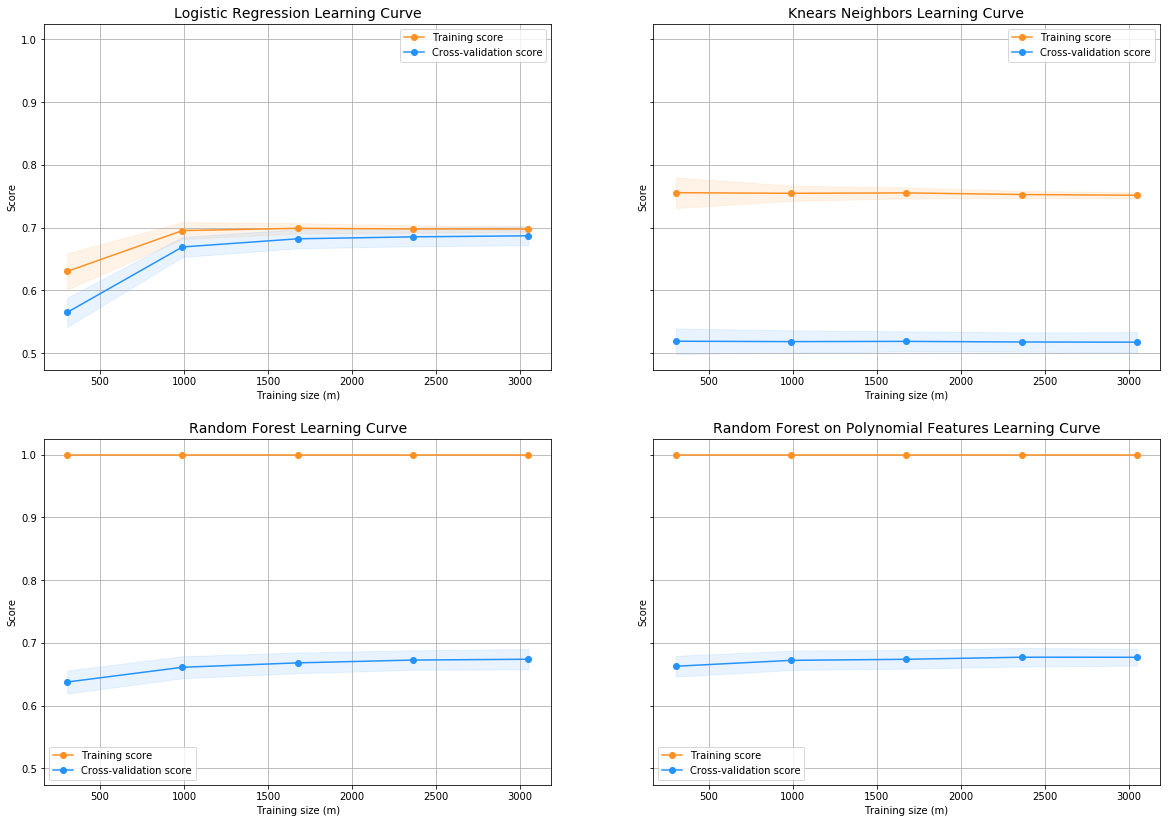

In [87]:
#Plotting Learning Curve
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, random_forest, random_forest_poly, X_train, y_train, X_train_poly, y_train_poly, cv=cv, n_jobs=1)




In [88]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)
                                
random_forest_pred = cross_val_predict(random_forest, X_train, y_train, cv=5)

random_forest_pred_poly = cross_val_predict(random_forest_poly, X_train_poly, y_train_poly, cv=5)

In [89]:
with open('log_reg_pred.pickle', 'wb') as pickle_file:
    pickle.dump(log_reg_pred, pickle_file)
    
with open('knears_pred.pickle', 'wb') as pickle_file:
    pickle.dump(knears_pred, pickle_file)

with open('random_forest_pred.pickle', 'wb') as pickle_file:
    pickle.dump(random_forest_pred, pickle_file)

with open('random_forest_pred_poly.pickle', 'wb') as pickle_file:
    pickle.dump(random_forest_pred_poly, pickle_file)

In [90]:
###Evaluating ROC AUC Scores

from sklearn.metrics import roc_auc_score

print('Logistic Regression AUC: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors AUC: ', roc_auc_score(y_train, knears_pred))
print('Random Forest AUC: ', roc_auc_score(y_train, random_forest_pred))
print('Random Forest Poly AUC: ', roc_auc_score(y_train_poly, random_forest_pred_poly))

Logistic Regression AUC:  0.7511436501733171
KNears Neighbors AUC:  0.5245596292728175
Random Forest AUC:  0.6764439461315293
Random Forest Poly AUC:  0.6678633337354356


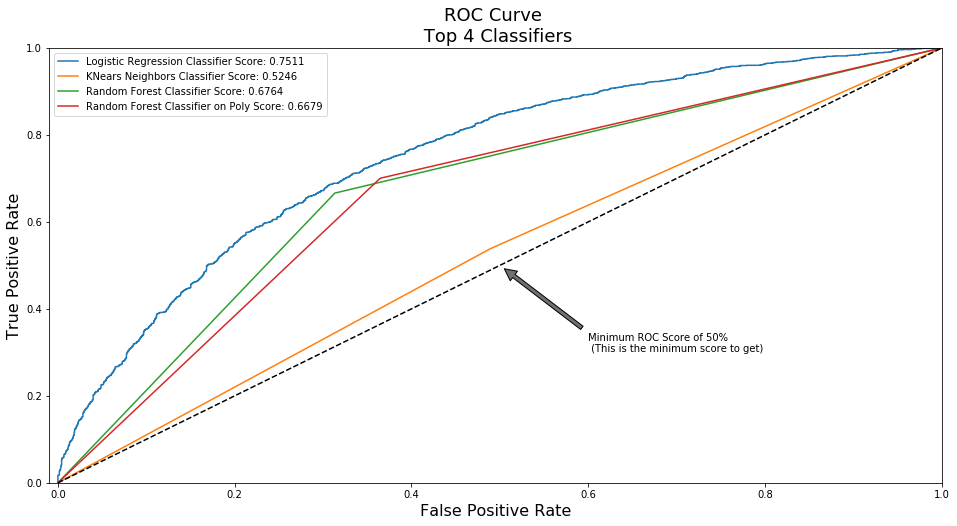

In [91]:
###Drawing ROC Curve for whole classifier methods.


log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_train, random_forest_pred)
rfp_fpr, rfp_tpr, rfp_threshold = roc_curve(y_train_poly, random_forest_pred_poly)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, rf_fpr, rf_tpr, rfp_fpr, rfp_tpr):
    a = plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_train, random_forest_pred)))
    plt.plot(rfp_fpr, rfp_tpr, label='Random Forest Classifier on Poly Score: {:.4f}'.format(roc_auc_score(y_train_poly, random_forest_pred_poly)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    with open('roc_curve.pickle', 'wb') as pickle_file:
        pickle.dump(a, pickle_file)
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, rf_fpr, rf_tpr , rfp_fpr, rfp_tpr)
plt.show()

In [92]:
###More detailed analysis on LogisticRegression

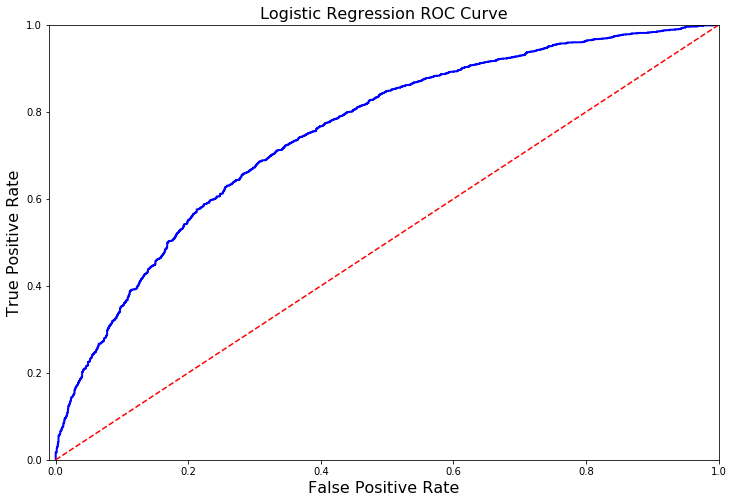

In [93]:
#Drawing ROC Curve for Logistic Regression

def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [94]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [95]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case

print('Overfitting: \n')
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))

print('---' * 35)

# How it should look like
print('---' * 35)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 35)

Overfitting: 

Accuracy Score: 0.69
Recall Score: 0.68
Precision Score: 0.70
F1 Score: 0.69
---------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.69
Recall Score: 0.53
Precision Score: 0.07
F1 Score: 0.13
---------------------------------------------------------------------------------------------------------


In [96]:
#Undersample Score Calculation

undersample_y_score = log_reg.decision_function(original_Xtest)

In [97]:
#Calculating average precision-recall score

from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.19


In [98]:
with open('undersample_average_precision.pickle', 'wb') as pickle_file:
    pickle.dump(undersample_average_precision, pickle_file)


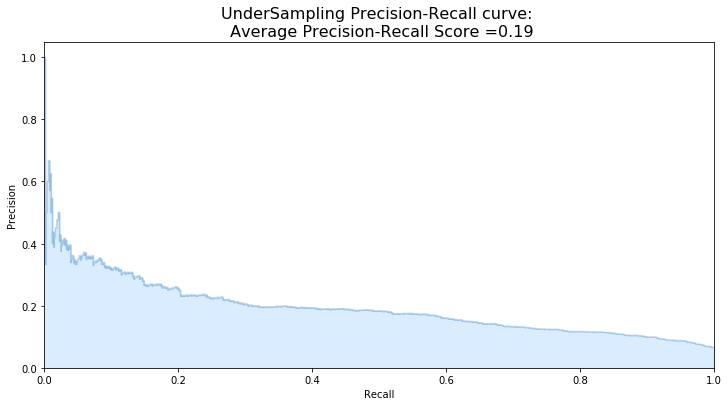

In [99]:
#Drawing Undersampling Precision-Recall Curve

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)


with open('undersample_average_precision_recall_curve.pickle', 'wb') as pickle_file:
    pickle.dump(fig, pickle_file)


In [100]:
###SMOTE Technique (Over-Sampling)

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()




rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique (oversampling)
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 35)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 35)

Length of X (train): 29012 | Length of y (train): 29012
Length of X (test): 7252 | Length of y (test): 7252


C:\Users\bus\Anaconda3\lib\site-packages\imblearn\pipeline.py:190: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if memory.cachedir is None:
C:\Users\bus\Anaconda3\lib\site-packages\imblearn\pipeline.py:190: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if memory.cachedir is None:
C:\Users\bus\Anaconda3\lib\site-packages\imblearn\pipeline.py:190: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if memory.cachedir is None:
C:\Users\bus\Anaconda3\lib\site-packages\imblearn\pipeline.py:190: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be remove

---------------------------------------------------------------------------------------------------------

accuracy: 0.7038112644918421
precision: 0.13641507697279107
recall: 0.6579351664811532
f1: 0.2259435774545012
---------------------------------------------------------------------------------------------------------


In [101]:
with open('accuracy_lst.pickle', 'wb') as pickle_file:
    pickle.dump(accuracy_lst, pickle_file)
with open('precision_lst.pickle', 'wb') as pickle_file:
    pickle.dump(precision_lst, pickle_file)
with open('recall_lst.pickle', 'wb') as pickle_file:
    pickle.dump(recall_lst, pickle_file)
with open('f1_lst.pickle', 'wb') as pickle_file:
    pickle.dump(f1_lst, pickle_file)


In [102]:
#Performance Measurements of Payer and Non-Payers

labels = ['Pay', 'Non-Pay']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

best_class_report = classification_report(original_ytest, smote_prediction, target_names=labels)


with open('best_class_report.pickle', 'wb') as pickle_file:
    pickle.dump(best_class_report, pickle_file)

              precision    recall  f1-score   support

         Pay       0.97      0.72      0.82      6776
     Non-Pay       0.14      0.68      0.24       476

    accuracy                           0.71      7252
   macro avg       0.56      0.70      0.53      7252
weighted avg       0.91      0.71      0.78      7252



In [103]:
y_score = best_est.decision_function(original_Xtest)

In [104]:
#Average Score

average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

with open('average_precision.pickle', 'wb') as pickle_file:
    pickle.dump(average_precision, pickle_file)


Average precision-recall score: 0.19


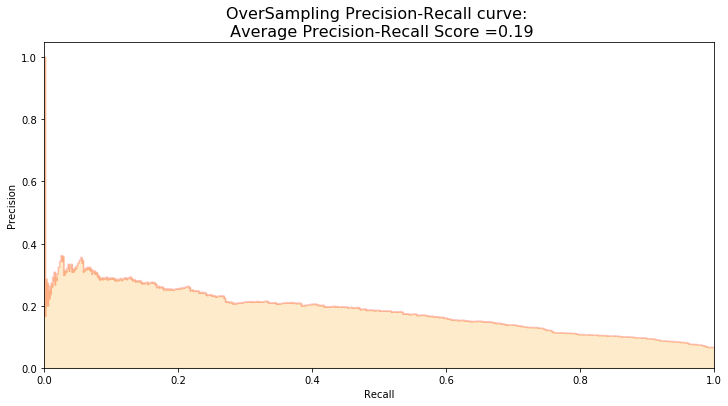

In [105]:
#Drawing Oversampling Precision-Recall Curve

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

with open('oversample_average_precision_recall_curve.pickle', 'wb') as pickle_file:
    pickle.dump(fig, pickle_file)


In [106]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(ratio='minority', random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_sample(original_Xtrain, original_ytrain)

In [107]:
# Implement GridSearchCV and the other models.

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :23.12141752243042 sec


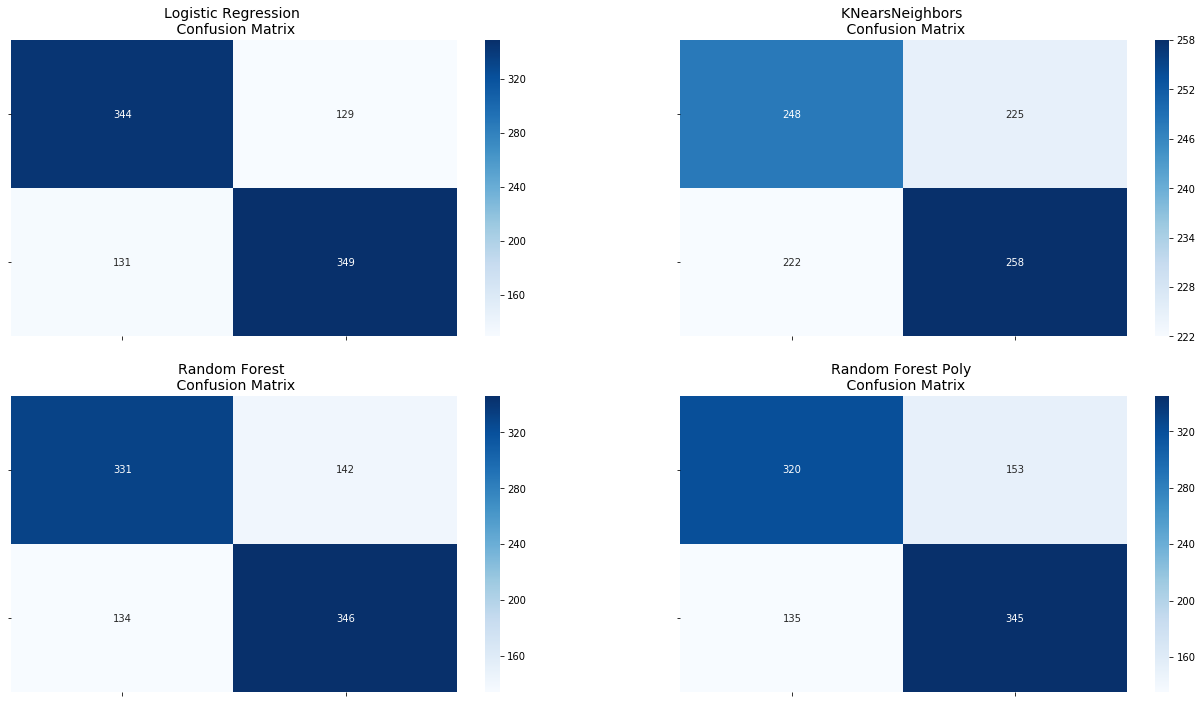

In [108]:
#Drawing Confusion Matrices of all classifiers

from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)

y_pred_rf = random_forest.predict(X_test)

y_pred_rfp = random_forest_poly.predict(X_test_poly)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
random_forest_cf = confusion_matrix(y_test, y_pred_rf)
random_forest_cfp = confusion_matrix(y_test_poly, y_pred_rfp)

f, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax1 , annot=True, cmap=plt.cm.Blues , fmt ='g')
ax1.set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax1.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax1.set_yticklabels(['', ''], fontsize=14, rotation=360)


sns.heatmap(kneighbors_cf, ax=ax2, annot=True, cmap=plt.cm.Blues , fmt ='g')
ax2.set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax2.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax2.set_yticklabels(['', ''], fontsize=14, rotation=360)


sns.heatmap(random_forest_cf, ax=ax3, annot=True, cmap=plt.cm.Blues , fmt ='g')
ax3.set_title("Random Forest \n Confusion Matrix", fontsize=14)
ax3.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax3.set_yticklabels(['', ''], fontsize=14, rotation=360)



sns.heatmap(random_forest_cfp, ax=ax4, annot=True, cmap=plt.cm.Blues , fmt ='g')
ax4.set_title("Random Forest Poly \n Confusion Matrix", fontsize=14)
ax4.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax4.set_yticklabels(['', ''], fontsize=14, rotation=360)

with open('confusion_matrices.pickle', 'wb') as pickle_file:
    pickle.dump(f, pickle_file)

plt.show()




In [109]:
#Comparing classifiers depending on their performance measurements.

from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Random Forest Neighbors:')
print(classification_report(y_test, y_pred_rf))


print('Random Forest Poly Neighbors:')
print(classification_report(y_test_poly, y_pred_rfp))


class_rep_log = classification_report(y_test, y_pred_log_reg)
class_rep_knear = classification_report(y_test, y_pred_knear)
class_rep_rf = classification_report(y_test, y_pred_rf)
class_rep_rfp = classification_report(y_test_poly, y_pred_rfp)


with open('class_rep_log.pickle', 'wb') as pickle_file:
    pickle.dump(class_rep_log, pickle_file)
    
with open('class_rep_knear.pickle', 'wb') as pickle_file:
    pickle.dump(class_rep_knear, pickle_file)
    
with open('class_rep_rf.pickle', 'wb') as pickle_file:
    pickle.dump(class_rep_rf, pickle_file)

with open('class_rep_rfp.pickle', 'wb') as pickle_file:
    pickle.dump(class_rep_rfp, pickle_file)
    




Logistic Regression:
              precision    recall  f1-score   support

           0       0.72      0.73      0.73       473
           1       0.73      0.73      0.73       480

    accuracy                           0.73       953
   macro avg       0.73      0.73      0.73       953
weighted avg       0.73      0.73      0.73       953

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.53      0.52      0.53       473
           1       0.53      0.54      0.54       480

    accuracy                           0.53       953
   macro avg       0.53      0.53      0.53       953
weighted avg       0.53      0.53      0.53       953

Random Forest Neighbors:
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       473
           1       0.71      0.72      0.71       480

    accuracy                           0.71       953
   macro avg       0.71      0.71      0.71       953
weighted a

In [110]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)

# Logistic Regression with SMOTE Technique
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

with open('final_df.pickle', 'wb') as pickle_file:
    pickle.dump(final_df, pickle_file)

# Note how high is accuracy score it can be misleading! 
final_df




,Technique,Score
0,Random UnderSampling,0.727177
1,Oversampling (SMOTE),0.712493


In [111]:
# Extract feature importances
train = new_app_train.drop(columns = ['TARGET'])

features = list(train.columns)

feature_importance_values = rf.feature_importances_

feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})


In [112]:
###Model Interpretation: Feature Importances

def plot_feature_importances(df):
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    a = plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    
    with open('feature_importances_sorted.pickle', 'wb') as pickle_file:
        pickle.dump(a, pickle_file)
    
    plt.show()
    
    return df

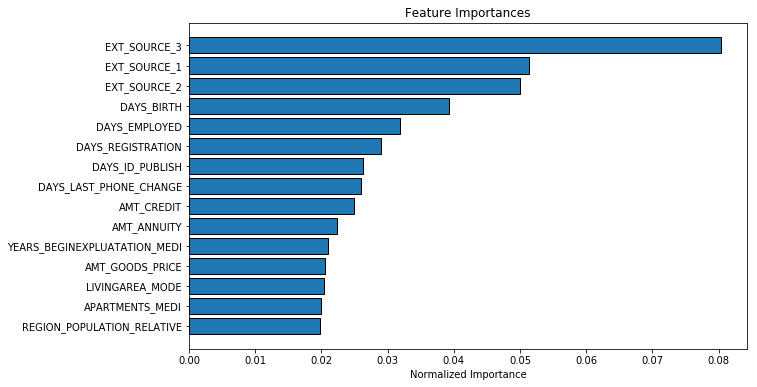

In [113]:
# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

In [114]:
###Model Interpretation: Feature Importances

def plot_feature_importances_dom(df):
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    a = plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    
    with open('feature_importances_domain_sorted.pickle', 'wb') as pickle_file:
        pickle.dump(a, pickle_file)
    
    plt.show()
    
    return df

In [115]:
# Extract feature importances of the domain we created.

app_train_domain = app_train_domain.drop(columns = 'TARGET')
domain_features_names = list(app_train_domain.columns)

random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# Train on the training data
random_forest_domain.fit(app_train_domain, y)
feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished


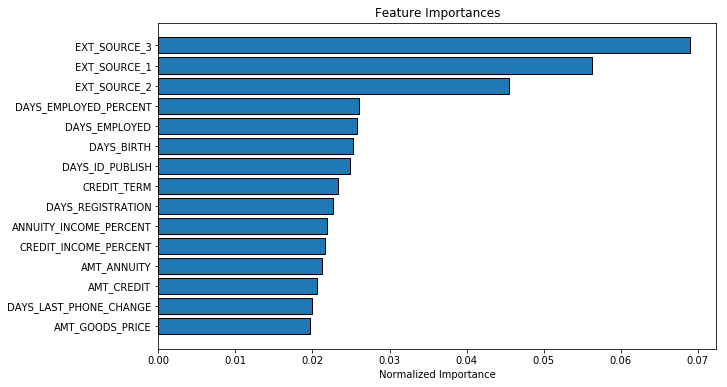

In [116]:
feature_importances_domain_sorted = plot_feature_importances_dom(feature_importances_domain)